# Ensemble of Selection Functions

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('/users/PHS0336/medirz90/github/LSSutils')
from lssutils.dataviz import setup_color, mollview, mycolor
from lssutils.stats.nnbar import get_meandensity, hist
from lssutils.stats.cl import get_cl
import lssutils.utils as ut
import healpy as hp
import fitsio as ft
from lssutils.lab import AnaFast
from glob import glob

In [2]:
setup_color()

## Fpix

In [3]:
regions = ['bmzls', 'ndecals', 'sdecals']
fpix = {}
for region in regions:
    df_ = ft.read(f'/fs/ess/PHS0336/data/rongpu/imaging_sys/tables/v3/nelg_features_{region}_1024.fits')
    fpix[region] = ut.make_hp(1024, df_['hpix'], df_['fracgood'])

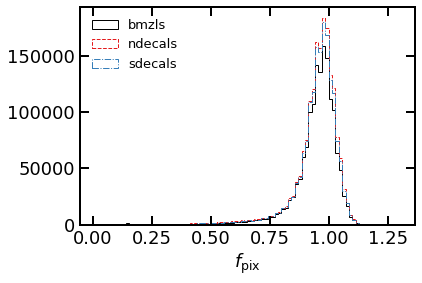

In [27]:
for region in regions:
    plt.hist(fpix[region], label=region, bins=90, histtype='step', range=(0.01, 1.3))
plt.xlabel(r'$f_{\rm pix}$')
plt.legend(loc=2)
# plt.yscale('log')
# plt.ylim()

In [30]:
fpix_map = np.zeros(12*1024*1024)

for region in regions:
    fpix_map += fpix[region]

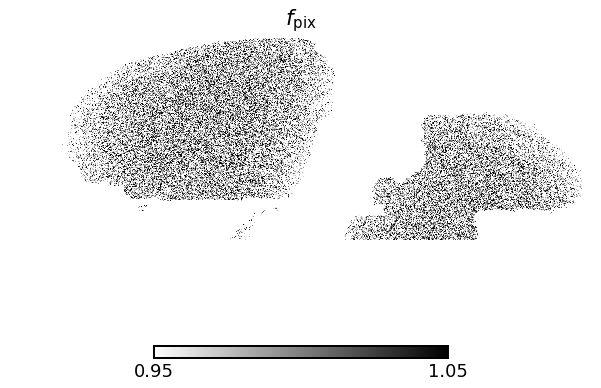

In [41]:
hp.mollview(fpix_map, rot=120, min=0.95, max=1.05, cmap=plt.cm.binary, title=r'$f_{\rm pix}$')

In [42]:
hp.write_map('fpix_map.hp1024.fits', fpix_map, fits_IDL=False, dtype=np.float64)

In [43]:
!gzip fpix_map.hp1024.fits

In [44]:
ls

cl_sg_green_sfd.npz                     LinEnsemble-weighted.ipynb
cl_sg_lenz_green_sfd.npz                logHIvsHI.ipynb
clustering_elg1024dr9.ipynb             meanden_ebv_windows.pdf
clustering_sepvsfull.ipynb              nn_windows.pdf
cross_correlation_nonlinear-1024.ipynb  power_templates.ipynb
cross_correlation_nonlinear.ipynb       pscell_dr9elg.pdf
Ensemble.ipynb                          pscell_windows.pdf
EnsembleWindows.ipynb                   selection_functions.ipynb
fpix_map.hp1024.fits.gz                 split_test.ipynb
GaussianMocks.ipynb                     TestCoordinatesNside.ipynb
LinEnsemble.ipynb                       Window_Vs_Mask.ipynb


## Windows

In [3]:
ws0 = glob('/fs/ess/PHS0336/data/tanveer/dr9/v3/elg_dnn/windows/nn*.fits')
ws0 = np.random.permutation(ws0)
len(ws0), ws0[:5]

(1000,
 array(['/fs/ess/PHS0336/data/tanveer/dr9/v3/elg_dnn/windows/nnwindow_224.hp1024.fits',
        '/fs/ess/PHS0336/data/tanveer/dr9/v3/elg_dnn/windows/nnwindow_274.hp1024.fits',
        '/fs/ess/PHS0336/data/tanveer/dr9/v3/elg_dnn/windows/nnwindow_580.hp1024.fits',
        '/fs/ess/PHS0336/data/tanveer/dr9/v3/elg_dnn/windows/nnwindow_902.hp1024.fits',
        '/fs/ess/PHS0336/data/tanveer/dr9/v3/elg_dnn/windows/nnwindow_322.hp1024.fits'],
       dtype='<U76'))

In [4]:
ws1 = glob('/fs/ess/PHS0336/data/tanveer/dr9/v3/elg_linear/windows/lin*.fits')
ws1 = np.random.permutation(ws1)
len(ws1), ws1[:5]

(1000,
 array(['/fs/ess/PHS0336/data/tanveer/dr9/v3/elg_linear/windows/linwindow_718.hp1024.fits',
        '/fs/ess/PHS0336/data/tanveer/dr9/v3/elg_linear/windows/linwindow_887.hp1024.fits',
        '/fs/ess/PHS0336/data/tanveer/dr9/v3/elg_linear/windows/linwindow_350.hp1024.fits',
        '/fs/ess/PHS0336/data/tanveer/dr9/v3/elg_linear/windows/linwindow_236.hp1024.fits',
        '/fs/ess/PHS0336/data/tanveer/dr9/v3/elg_linear/windows/linwindow_293.hp1024.fits'],
       dtype='<U80'))

In [5]:
d0 = []
d1 = []
kw = dict(verbose=False, dtype=np.float32)

for i in range(100):

    d0.append(hp.read_map(ws0[i], **kw))
    d1.append(hp.read_map(ws1[i], **kw))
    
    print('.', end='')

....................................................................................................

## mollweide window

<ipython-input-54-9006cecff0c0>:25: RuntimeWarning: invalid value encountered in subtract
  image2 = mollview(d_i-d_i1, -1, 1, '', figax=[fig, ax_i3], cmap=plt.cm.bwr)


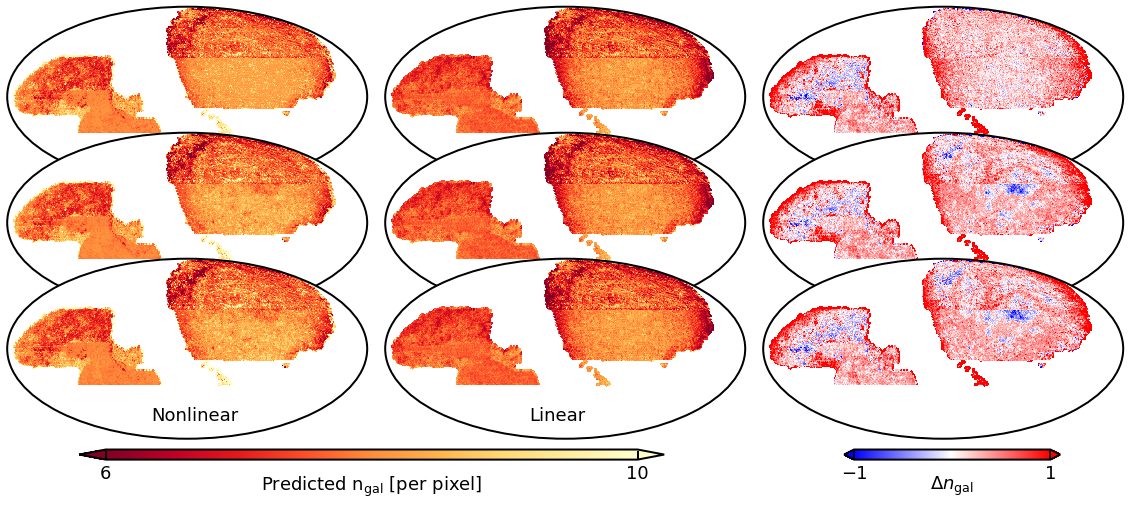

In [54]:
fig = plt.figure(figsize=(5, 7))
ax0  = fig.add_axes([0, 0, 1., 1],       projection='mollweide')
ax1  = fig.add_axes([0., -0.25, 1., 1], projection='mollweide')
ax2  = fig.add_axes([0., -0.50, 1., 1], projection='mollweide')

ax3  = fig.add_axes([1.05, 0, 1., 1],       projection='mollweide')
ax4  = fig.add_axes([1.05, -0.25, 1., 1], projection='mollweide')
ax5  = fig.add_axes([1.05, -0.50, 1., 1], projection='mollweide')

ax6  = fig.add_axes([2.1, 0, 1., 1],       projection='mollweide')
ax7  = fig.add_axes([2.1, -0.25, 1., 1], projection='mollweide')
ax8  = fig.add_axes([2.1, -0.50, 1., 1], projection='mollweide')

for i, (ax_i1, ax_i2, ax_i3) in enumerate(zip([ax0, ax1, ax2], 
                                              [ax3, ax4, ax5],
                                              [ax6, ax7, ax8])):
    d_i = d0[i]*1.0
    d_i[d_i==0] = np.inf
    image0 = mollview(d_i, 6, 10, '', figax=[fig, ax_i1], cmap=plt.cm.YlOrRd_r)

    d_i1 = d1[i]*1.0
    d_i1[d_i1==0] = np.inf
    image1 = mollview(d_i1, 6, 10, '', figax=[fig, ax_i2], cmap=plt.cm.YlOrRd_r)
    
    image2 = mollview(d_i-d_i1, -1, 1, '', figax=[fig, ax_i3], cmap=plt.cm.bwr)
    
    ax_i1.set(xticks=[], yticks=[])
    ax_i2.set(xticks=[], yticks=[])
    ax_i3.set(xticks=[], yticks=[])
    
    
    
cax = plt.axes([0.2, -0.22, 1.625, 0.02])  # horizontal
cb  = fig.colorbar(image0, cax=cax, label=r'Predicted n$_{{\rm gal}}$ [per pixel]', fraction=0.15,
                   shrink=0.6, ticks=[6, 10],
                   orientation='horizontal', extend='both')        
cb.ax.xaxis.labelpad = -8
cb.solids.set_edgecolor("face")


cax = plt.axes([2.325, -0.22, 0.6, 0.02])  # horizontal
cb  = fig.colorbar(image2, cax=cax, label=r'$\Delta n_{{\rm gal}}$', fraction=0.15,
                   shrink=0.6, ticks=[-1, 1],
                   orientation='horizontal', extend='both')        
cb.ax.xaxis.labelpad = -8
cb.solids.set_edgecolor("face")


ax2.text(0.4, 0.1, 'Nonlinear', transform=ax2.transAxes)
ax5.text(0.4, 0.1, 'Linear', transform=ax5.transAxes)

fig.savefig('nn_windows.pdf', bbox_inches='tight')

In [6]:
regions = ['bmzls', 'ndecals', 'sdecals']
df = {}

for region in regions:
    df[region] = ft.read(f'/fs/ess/PHS0336/data/rongpu/imaging_sys/tables/v3/nelg_features_{region}_1024.fits')

In [8]:
ng_data = {}

for region in regions:
    ng_ = ut.make_hp(1024, df[region]['hpix'], df[region]['label'])
    fr_ = ut.make_hp(1024, df[region]['hpix'], df[region]['fracgood'])
    ms_ = ut.make_hp(1024, df[region]['hpix'], 1.0) > 0.5
    st_ = ut.make_hp(1024, df[region]['hpix'], df[region]['features'][:, 0])[:, np.newaxis]
    
    ng_data[region] = get_meandensity(ng_, fr_, ms_, st_, njack=20)
    print(region)

bmzls
ndecals
sdecals


In [10]:
ng_wind0 = {}
ng_wind1 = {}

for region in regions:
    fr_ = ut.make_hp(1024, df[region]['hpix'], df[region]['fracgood'])
    ms_ = ut.make_hp(1024, df[region]['hpix'], 1.0) > 0.5
    st_ = ut.make_hp(1024, df[region]['hpix'], df[region]['features'][:, 0])#[:, np.newaxis]

    ng_wind = []
    for d_i in d0:
        d_ij = d_i*1.0
        d_ij = d_ij / np.median(d_ij[ms_])
        d_ij = d_ij.clip(0.5, 2.0)
        ng_wind.append(hist((d_ij*fr_)[ms_], fr_[ms_], st_[ms_], bins=ng_data[region][0]['bin_edges']))
        print('.', end='')
    ng_wind0[region] = ng_wind
    print('')
    
    ng_wind = []
    for d_i in d1:
        d_ij = d_i*1.0
        d_ij = d_ij / np.median(d_ij[ms_])
        d_ij = d_ij.clip(0.5, 2.0)
        ng_wind.append(hist((d_ij*fr_)[ms_], fr_[ms_], st_[ms_], bins=ng_data[region][0]['bin_edges']))
        print('.', end='')
        
    ng_wind1[region] = ng_wind       
    print(region)

....................................................................................................
....................................................................................................bmzls
....................................................................................................
....................................................................................................ndecals
....................................................................................................
....................................................................................................sdecals


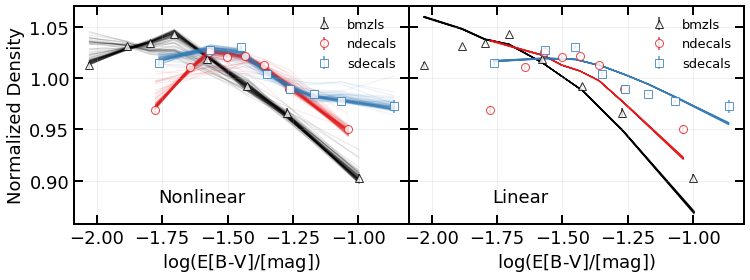

In [17]:
def add_plot(ax, ng_data, nb_winds, text=''):
    
    mk = ['^', 'o', 's']

    i = 0
    for n_i, ng_i in ng_data.items():
        ln = ax.errorbar(np.log10(ng_i[0]['bin_avg']), ng_i[0]['nnbar'], yerr=ng_i[0]['nnbar_err'], 
                         marker=mk[i], markersize=8, mfc='w', alpha=0.8, ls='None', label=n_i)
        i += 1
        for ng_j in nb_winds[n_i]:
            ax.plot(np.log10(ng_j[0]), ng_j[1], color=ln[0].get_color(), 
                    ls='-', lw=1, alpha=0.1, zorder=-10)

    ax.set(xlabel=r'$\log$(E[B-V]/[mag])') # ylim=(0.89, 1.05), 
    ax.legend()
    ax.grid(lw=1, alpha=0.2)
    ax.text(0.25, 0.1, text, transform=ax.transAxes)
    

    
fg, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True, sharex=True)
fg.subplots_adjust(wspace=0.0)


add_plot(ax[0], ng_data, ng_wind0, 'Nonlinear')
add_plot(ax[1], ng_data, ng_wind1, 'Linear')
ax[0].set_ylabel('Normalized Density')

fg.savefig('meanden_ebv_windows.pdf', bbox_inches='tight')

In [8]:
ng_wind0 = {}
ng_wind1 = {}

for region in regions:
    fr_ = ut.make_hp(1024, df[region]['hpix'], df[region]['fracgood'])
    ms_ = ut.make_hp(1024, df[region]['hpix'], 1.0) > 0.5

    ng_wind = []
    for d_i in d0:
        d_ij = d_i*1.0
        d_ij = d_ij / np.median(d_ij[ms_])
        d_ij = d_ij.clip(0.5, 2.0)
        ng_wind.append(get_cl(d_ij*fr_, fr_, ms_, njack=0)['cl_gg']['cl'])
        print('.', end='')
    ng_wind0[region] = ng_wind
    print('')
    
    ng_wind = []
    for d_i in d1:
        d_ij = d_i*1.0
        d_ij = d_ij / np.median(d_ij[ms_])
        d_ij = d_ij.clip(0.5, 2.0)
        ng_wind.append(get_cl(d_ij*fr_, fr_, ms_, njack=0)['cl_gg']['cl'])
        print('.', end='')
        
    ng_wind1[region] = ng_wind       
    print(region)

....................................................................................................
....................................................................................................bmzls
....................................................................................................
....................................................................................................ndecals
....................................................................................................
....................................................................................................sdecals


In [33]:
cl_data = {}

for region in regions:
    ng_ = ut.make_hp(1024, df[region]['hpix'], df[region]['label'])
    fr_ = ut.make_hp(1024, df[region]['hpix'], df[region]['fracgood'])
    ms_ = ut.make_hp(1024, df[region]['hpix'], 1.0) > 0.5
    
    cl_data[region] = get_cl(ng_, fr_, ms_, njack=0)
    print(region)

bmzls
ndecals
sdecals


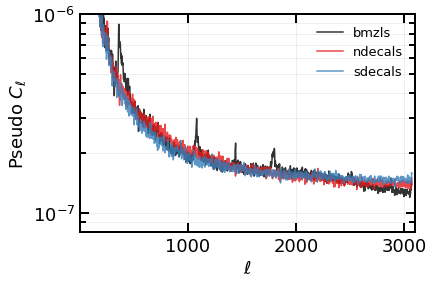

In [52]:
fg, ax = plt.subplots()


for n, cl_i in cl_data.items():
    ax.plot(cl_i['cl_gg']['cl'], ls='-', alpha=0.8, label=n)

ax.legend(loc='upper right')
ax.set(xlim=(1.0, 3100), yscale='log',
       ylim=(8.0e-8, 1.0e-6), xlabel=r'$\ell$', ylabel=r'Pseudo $C_{\ell}$')
ax.grid(lw=1, alpha=0.2, which='both')
fg.savefig('pscell_dr9elg.pdf', bbox_inches='tight')

In [ ]:
def add_plot(ax, nb_winds, text=''):
    
    mk = ['^', 'o', 's']
    colors = ['C0', 'C1', 'C2']
    
    for i, n_i in enumerate(['bmzls','ndecals', 'sdecals']):
        
        cl_mean = np.mean(nb_winds[n_i], axis=0)
        
        for ng_j in nb_winds[n_i]:
            
            ax.plot(ng_j, color=colors[i], 
                    ls='-', lw=1, alpha=0.1, zorder=-10)
            
        ax.plot(cl_mean, color=colors[i], ls='-', label=n_i)

#     ax.set(ylim=(0.3, 1.8)) #xlabel=r'$\log$(E[B-V]/[mag])') # ylim=(0.89, 1.05), 
    ax.legend(loc='upper right')
    ax.set(yscale='log', xlim=(1.0, 3100), 
           ylim=(1.0e-10, 1.0e-2), xlabel=r'$\ell$')
    ax.grid(lw=1, alpha=0.2, which='both')
    ax.text(0.15, 0.8, text, transform=ax.transAxes)
    

    
fg, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True, sharex=True)
fg.subplots_adjust(wspace=0.0)


add_plot(ax[0], ng_wind0, 'Nonlinear')
add_plot(ax[1], ng_wind1, 'Linear')
ax[0].set_ylabel(r'Pseudo $C_{\ell}$')

fg.savefig('pscell_windows.pdf', bbox_inches='tight', dpi=300)

bmzls
ndecals
sdecals


(1e-07, 0.002)

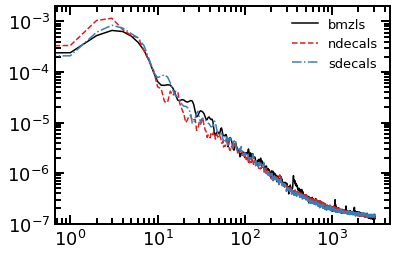

In [23]:
cl_windows = {}

for region in regions:
    #ng_ = ut.make_hp(1024, df[region]['hpix'], df[region]['label'])
    fr_ = ut.make_hp(1024, df[region]['hpix'], df[region]['fracgood'])
    ms_ = ut.make_hp(1024, df[region]['hpix'], 1.0) > 0.5

    cl_wind = []
    for d_i in d_[:20]:
        vmin, vmax = np.percentile(d_i[ms_], [1, 99])
        d_i = d_i.clip(vmin, vmax)
        cl_wind.append(get_cl(d_i*fr_, fr_, ms_, njack=0)['cl_gg']['cl'])
        print('.', end='')
        
    cl_windows[region] = cl_wind
    print(region)

....................bmzls
....................ndecals
....................sdecals


(1e-10, 0.002)

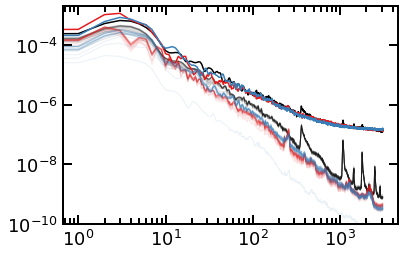

In [26]:
for reg in ['bmzls', 'ndecals', 'sdecals']:
    
    ln = plt.plot(cl_data[reg]['cl_gg']['cl'], ls='-')

    for cl_i in cl_windows[reg]:
        plt.plot(cl_i, ls='-', color=ln[0].get_color(), alpha=0.1, lw=1)
plt.loglog()
plt.ylim(1.0e-10, 2.0e-3)

In [ ]:
for n, cl_i in cl_data.items():
    plt.loglog(cl_i['cl_gg']['cl'], label=n)
    
    
    
plt.legend()
plt.ylim(1.0e-7, 2.0e-3)

In [ ]:
cl = []

for i, d_i in enum

In [ ]:
# 2. compute spectra of nn/lin windows
# 3. compute mean density of nn/lin windows

In [7]:
d = hp.read_map('/fs/ess/PHS0336/data/tanveer/dr9/v3/elg_dnn/windows/nnwindow_0.hp1024.fits', 
                verbose=False, dtype=np.float64)

In [9]:
np.percentile(d[d!=0.0], [1, 99])

array([ 6.22025575, 10.06566978])

(array([  44141.,  103220.,  373720.,  813125., 1366143., 1344251.,
         659767.,  187529.,   60704.,   40997.]),
 array([ 6. ,  6.4,  6.8,  7.2,  7.6,  8. ,  8.4,  8.8,  9.2,  9.6, 10. ]),
 <a list of 10 Patch objects>)

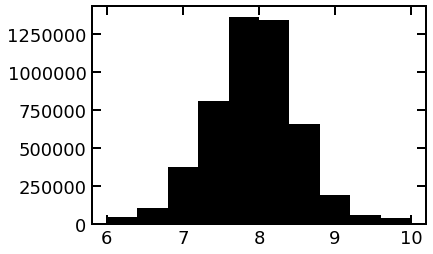

In [10]:
plt.hist(d[d!=0.0], range=(6., 10.))

In [14]:
d[d==0.0] = np.inf

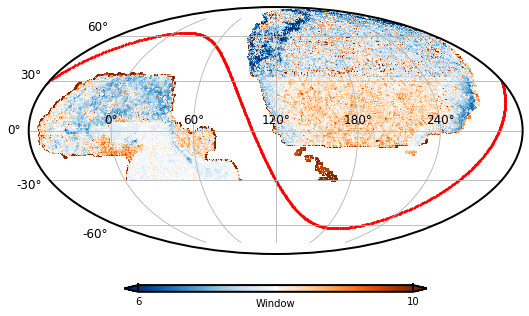

In [17]:
mollview(d, 6, 10, 'Window', galaxy=True, colorbar=True, cmap=mycolor())